In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)


In [18]:
# Generate 100 days of data
dates = pd.date_range(start="2025-07-01", end="2025-10-08")  # 100 days

# Products list
products = ["Adidas Sneakers", "Adidas T-Shirt", "Adidas Shorts", "Adidas Cap", "Adidas Jacket"]

# Payment methods
payment_methods = ["Cash", "Credit Card", "Online Payment"]

# Generate dataset
data = []

for date in dates:
    for _ in range(50):  # 50 transactions per day
        product = np.random.choice(products)
        quantity = np.random.randint(1, 20)
        if product == "Adidas Sneakers":
            price = 120
        elif product == "Adidas T-Shirt":
            price = 35
        elif product == "Adidas Shorts":
            price = 50
        elif product == "Adidas Cap":
            price = 25
        elif product == "Adidas Jacket":
            price = 150
        total_sales = quantity * price
        payment = np.random.choice(payment_methods)
        data.append([date.strftime("%Y-%m-%d"), product, quantity, price, total_sales, payment])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date","ProductName","Quantity","UnitPrice","TotalSales","PaymentMethod"])

# Check size
print(f"Dataset size: {df.shape[0]} rows")


Dataset size: 5000 rows


In [19]:
# Generate 100 days of data
dates = pd.date_range(start="2025-07-01", end="2025-10-08")  # 100 days

# Products list
products = ["Adidas Sneakers", "Adidas T-Shirt", "Adidas Shorts", "Adidas Cap", "Adidas Jacket"]

# Payment methods
payment_methods = ["Cash", "Credit Card", "Online Payment"]

# Generate dataset
data = []

for date in dates:
    for _ in range(50):  # 50 transactions per day
        product = np.random.choice(products)
        quantity = np.random.randint(1, 20)
        if product == "Adidas Sneakers":
            price = 120
        elif product == "Adidas T-Shirt":
            price = 35
        elif product == "Adidas Shorts":
            price = 50
        elif product == "Adidas Cap":
            price = 25
        elif product == "Adidas Jacket":
            price = 150
        total_sales = quantity * price
        payment = np.random.choice(payment_methods)
        data.append([date.strftime("%Y-%m-%d"), product, quantity, price, total_sales, payment])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Date","ProductName","Quantity","UnitPrice","TotalSales","PaymentMethod"])

# Check size
print(f"Dataset size: {df.shape[0]} rows")


Dataset size: 5000 rows


In [20]:
df.to_csv("adidas_sales_bigdata_5000.csv", index=False)
print("CSV file saved successfully! You can use it in Power BI.")


CSV file saved successfully! You can use it in Power BI.


In [21]:
# Load dataset
df = pd.read_csv("adidas_sales_bigdata_5000.csv")

# Basic info
print(df.head())
print(df.info())
print(df.describe())


         Date      ProductName  Quantity  UnitPrice  TotalSales  \
0  2025-07-01       Adidas Cap        14         25         350   
1  2025-07-01    Adidas Jacket         4        150         600   
2  2025-07-01    Adidas Jacket        13        150        1950   
3  2025-07-01  Adidas Sneakers         5        120         600   
4  2025-07-01   Adidas T-Shirt        10         35         350   

    PaymentMethod  
0  Online Payment  
1  Online Payment  
2     Credit Card  
3  Online Payment  
4            Cash  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           5000 non-null   object
 1   ProductName    5000 non-null   object
 2   Quantity       5000 non-null   int64 
 3   UnitPrice      5000 non-null   int64 
 4   TotalSales     5000 non-null   int64 
 5   PaymentMethod  5000 non-null   object
dtypes: int64(3), object(3)

In [22]:
# Check for missing values
print(df.isnull().sum())

# Remove missing values if any
df.dropna(inplace=True)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


Date             0
ProductName      0
Quantity         0
UnitPrice        0
TotalSales       0
PaymentMethod    0
dtype: int64


In [23]:
# Total daily sales
daily_sales = df.groupby('Date')['TotalSales'].sum().reset_index()

# Top 10 products by quantity
top_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)

# Payment method distribution
payment_distribution = df['PaymentMethod'].value_counts()

# Overall totals
total_sales = df['TotalSales'].sum()
total_quantity = df['Quantity'].sum()

print(f"Total Sales: ${total_sales}")
print(f"Total Quantity Sold: {total_quantity}")


Total Sales: $3853080
Total Quantity Sold: 50066


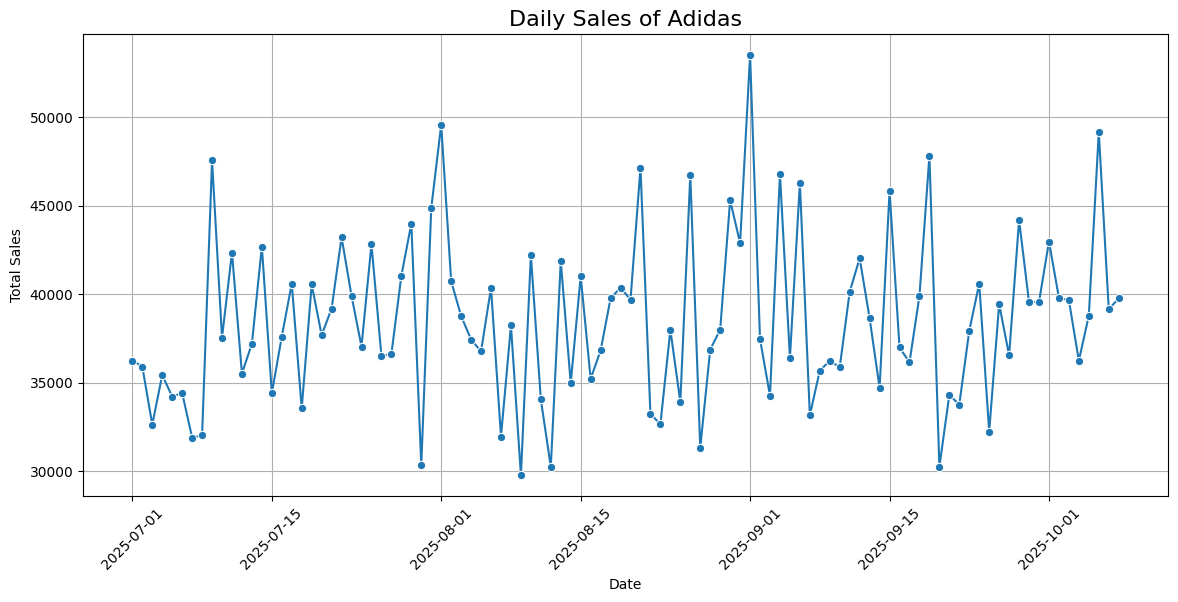

/tmp/ipython-input-1213231108.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


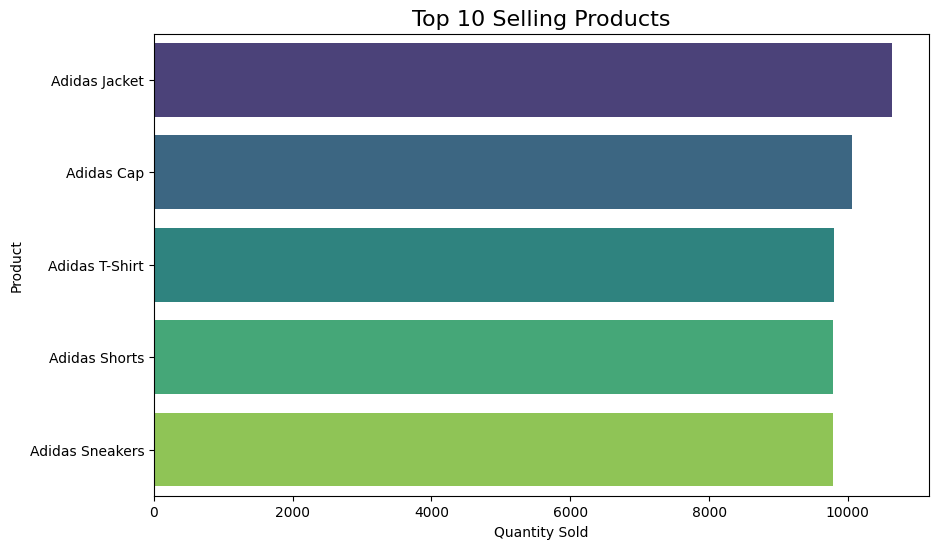

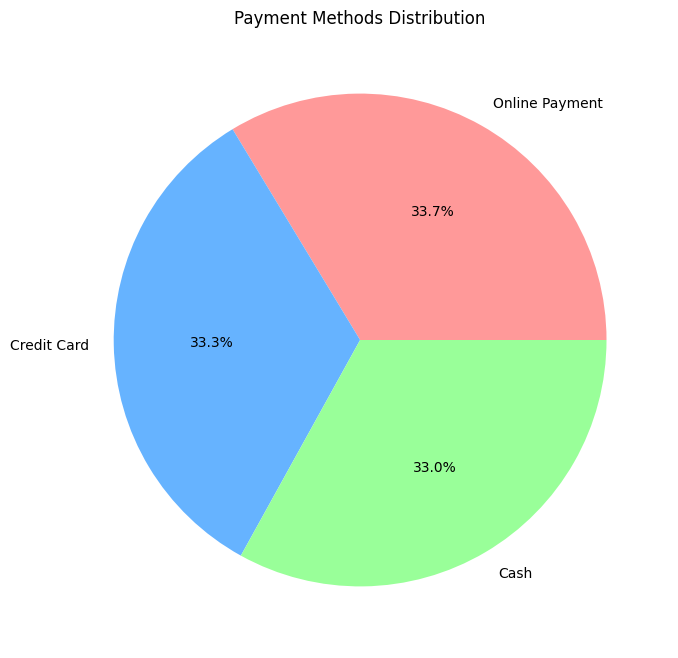

In [24]:
# Daily Sales Line Chart
plt.figure(figsize=(14,6))
sns.lineplot(x='Date', y='TotalSales', data=daily_sales, marker='o')
plt.title('Daily Sales of Adidas', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Top Products Bar Chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Selling Products', fontsize=16)
plt.xlabel('Quantity Sold')
plt.ylabel('Product')
plt.show()

# Payment Methods Pie Chart
plt.figure(figsize=(8,8))
payment_distribution.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Payment Methods Distribution')
plt.ylabel('')
plt.show()


/tmp/ipython-input-2339973957.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='TotalSales', data=monthly_sales, palette='coolwarm')


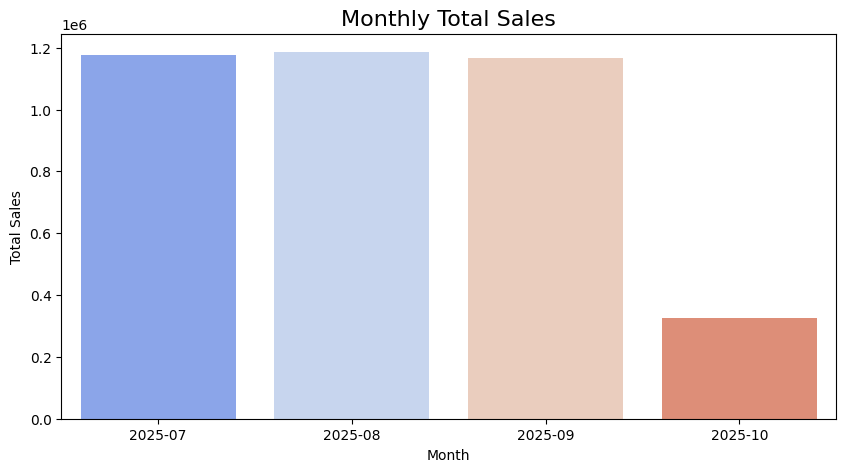

Top Product Each Month:
     Month     ProductName  Quantity
0  2025-07  Adidas T-Shirt      3365
1  2025-08   Adidas Shorts      3232
2  2025-09   Adidas Jacket      3375
3  2025-10   Adidas Jacket      1028


In [25]:
# Extract month
df['Month'] = df['Date'].dt.to_period('M')

# Monthly sales
monthly_sales = df.groupby('Month')['TotalSales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='TotalSales', data=monthly_sales, palette='coolwarm')
plt.title('Monthly Total Sales', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Top product each month
monthly_top = df.groupby(['Month','ProductName'])['Quantity'].sum().reset_index()
monthly_top_sorted = monthly_top.sort_values(['Month','Quantity'], ascending=[True, False])
top_each_month = monthly_top_sorted.groupby('Month').first().reset_index()
print("Top Product Each Month:")
print(top_each_month)


In [26]:
# Daily Sales Report
daily_sales.to_csv("daily_sales_report_5000.csv", index=False)

# Top Products Report
top_products.to_csv("top_products_report_5000.csv", header=['Quantity'])

# Monthly Sales Report
monthly_sales.to_csv("monthly_sales_report_5000.csv", index=False)

print("All reports saved successfully! You can now use them in Power BI.")


All reports saved successfully! You can now use them in Power BI.
